<a href="https://colab.research.google.com/github/ashikshafi08/Learning-Fastai/blob/main/Research%20and%20Assignments/Mnist_Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai --upgrade

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

     |████████████████████████████████| 194kB 13.0MB/s 
     |████████████████████████████████| 61kB 10.0MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61
     |████████████████████████████████| 727kB 12.4MB/s 
     |████████████████████████████████| 51kB 9.9MB/s 
     |████████████████████████████████| 1.2MB 29.3MB/s 
Mounted at /content/gdrive


In [2]:
from fastai import *
from fastai.vision.all import * 

In [3]:
# Getting the whole mnist data 

path = untar_data(URLs.MNIST)
path.ls()

(#2) [Path('/root/.fastai/data/mnist_png/training'),Path('/root/.fastai/data/mnist_png/testing')]

In [4]:
# Train and test 

training = path / 'training'
testing = path / 'testing'

In [5]:
training.ls()

(#10) [Path('/root/.fastai/data/mnist_png/training/8'),Path('/root/.fastai/data/mnist_png/training/4'),Path('/root/.fastai/data/mnist_png/training/7'),Path('/root/.fastai/data/mnist_png/training/9'),Path('/root/.fastai/data/mnist_png/training/1'),Path('/root/.fastai/data/mnist_png/training/0'),Path('/root/.fastai/data/mnist_png/training/2'),Path('/root/.fastai/data/mnist_png/training/3'),Path('/root/.fastai/data/mnist_png/training/6'),Path('/root/.fastai/data/mnist_png/training/5')]

In [6]:
# Putting them into one file 

zeros= (training / '0').ls().sorted()
ones= (training / '1').ls().sorted()
twos = (training / '2').ls().sorted()
threes = (training / '3').ls().sorted()
fours = (training / '4').ls().sorted()
fives = (training / '5').ls().sorted()
sixes= (training / '6').ls().sorted()
sevens = (training / '7').ls().sorted()
eights = (training / '8').ls().sorted()
nines = (training / '9').ls().sorted()



In [7]:
# Stacking and converting to tensors 

zero_tensor = [tensor(Image.open(o)) for o in zeros]
one_tensor = [tensor(Image.open(o)) for o in ones]
two_tensor = [tensor(Image.open(o)) for o in twos]
three_tensor = [tensor(Image.open(o)) for o in threes]
four_tensor = [tensor(Image.open(o)) for o in fours]
five_tensor = [tensor(Image.open(o)) for o in fives]
six_tensor = [tensor(Image.open(o)) for o in sixes]
seven_tensor = [tensor(Image.open(o)) for o in sevens]
eight_tensor = [tensor(Image.open(o)) for o in eights]
nine_tensor = [tensor(Image.open(o)) for o in nines]


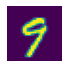

In [8]:
# Printing out a image from the data 

show_image(nine_tensor[5])

In [9]:
def stack_function(num_tensor):
  return torch.stack(num_tensor).float() / 255

In [10]:
# Casting our integer type to float 


stacked_zero = stack_function(zero_tensor)
stacked_one = stack_function(one_tensor)
stacked_two = stack_function(two_tensor)
stacked_three = stack_function(three_tensor)
stacked_four = stack_function(four_tensor)
stacked_five = stack_function(five_tensor)
stacked_six = stack_function(six_tensor)
stacked_seven = stack_function(seven_tensor)
stacked_eight = stack_function(eight_tensor)
stacked_nine = stack_function(nine_tensor)

# Creating a list of all stacked tensor 
stack_list = [stacked_zero , stacked_one , stacked_two , stacked_three , stacked_four , stacked_five , stacked_six , stacked_seven , stacked_eight , stacked_nine]

def print_shape(num_list):
  for i in num_list:
    print(f'The Shape of the tensor: {i.shape}')

In [11]:
# Printing the shape 
print_shape(stack_list)

The Shape of the tensor: torch.Size([5923, 28, 28])
The Shape of the tensor: torch.Size([6742, 28, 28])
The Shape of the tensor: torch.Size([5958, 28, 28])
The Shape of the tensor: torch.Size([6131, 28, 28])
The Shape of the tensor: torch.Size([5842, 28, 28])
The Shape of the tensor: torch.Size([5421, 28, 28])
The Shape of the tensor: torch.Size([5918, 28, 28])
The Shape of the tensor: torch.Size([6265, 28, 28])
The Shape of the tensor: torch.Size([5851, 28, 28])
The Shape of the tensor: torch.Size([5949, 28, 28])


In [12]:
all_labels = [zeros , ones , twos , threes , fours , fives , sixes , sevens , eights , nines]
all_labels

[(#5923) [Path('/root/.fastai/data/mnist_png/training/0/1.png'),Path('/root/.fastai/data/mnist_png/training/0/1000.png'),Path('/root/.fastai/data/mnist_png/training/0/10005.png'),Path('/root/.fastai/data/mnist_png/training/0/10010.png'),Path('/root/.fastai/data/mnist_png/training/0/10022.png'),Path('/root/.fastai/data/mnist_png/training/0/10025.png'),Path('/root/.fastai/data/mnist_png/training/0/10026.png'),Path('/root/.fastai/data/mnist_png/training/0/10045.png'),Path('/root/.fastai/data/mnist_png/training/0/10069.png'),Path('/root/.fastai/data/mnist_png/training/0/10071.png')...],
 (#6742) [Path('/root/.fastai/data/mnist_png/training/1/10006.png'),Path('/root/.fastai/data/mnist_png/training/1/10007.png'),Path('/root/.fastai/data/mnist_png/training/1/1002.png'),Path('/root/.fastai/data/mnist_png/training/1/10020.png'),Path('/root/.fastai/data/mnist_png/training/1/10027.png'),Path('/root/.fastai/data/mnist_png/training/1/1003.png'),Path('/root/.fastai/data/mnist_png/training/1/10040.pn

In [15]:
# Creating a dataset 

# Contructing train x 
train_x = torch.cat(stack_list).view(-1 , 28*28)

# Constructing train y 
train_y = tensor( [0] * len(zeros) + [1] * len(ones) + [2] * len(twos)+  [3] * len(threes) + [4] * len(fours) + [5] * len(fives) + [6] * len(sixes) + 
                 [7] * len(sevens) + [8] * len(eights) + [9] * len(nines)).unsqueeze(1)


# Checking the shape of both x and y  
train_x.shape , train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [16]:
# Zipping into a dataset 

mnist_dset = list(zip(train_x , train_y))

In [17]:
# Creating a DataLoader 

dl = DataLoader(mnist_dset , batch_size= 256 , shuffle=True)

# Picking up first batch 
xb , yb = first(dl)

xb.shape , yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [19]:
# Doing same for the validation set 

valid_zeros= (testing / '0').ls().sorted()
valid_ones= (testing / '1').ls().sorted()
valid_twos = (testing / '2').ls().sorted()
valid_threes = (testing / '3').ls().sorted()
valid_fours = (testing / '4').ls().sorted()
valid_fives = (testing / '5').ls().sorted()
valid_sixes= (testing / '6').ls().sorted()
valid_sevens = (testing / '7').ls().sorted()
valid_eights = (testing / '8').ls().sorted()
valid_nines = (testing / '9').ls().sorted()


# Stacking 

valid_zero_tensor = stack_function([tensor(Image.open(o)) for o in valid_zeros])
valid_one_tensor = stack_function([tensor(Image.open(o)) for o in valid_ones])
valid_two_tensor = stack_function([tensor(Image.open(o)) for o in valid_twos])
valid_three_tensor = stack_function([tensor(Image.open(o)) for o in valid_threes])
valid_four_tensor = stack_function([tensor(Image.open(o)) for o in valid_fours])
valid_five_tensor = stack_function([tensor(Image.open(o)) for o in valid_fives])
valid_six_tensor = stack_function([tensor(Image.open(o)) for o in valid_sixes])
valid_seven_tensor = stack_function([tensor(Image.open(o)) for o in valid_sevens])
valid_eight_tensor = stack_function([tensor(Image.open(o)) for o in valid_eights])
valid_nine_tensor = stack_function([tensor(Image.open(o)) for o in valid_nines])


# Stacked list 

valid_stack_list = [valid_zero_tensor , valid_one_tensor , valid_two_tensor , valid_three_tensor , valid_four_tensor , valid_five_tensor , 
              valid_six_tensor  , valid_seven_tensor , valid_eight_tensor , valid_nine_tensor]

print_shape(valid_stack_list)

The Shape of the tensor: torch.Size([980, 28, 28])
The Shape of the tensor: torch.Size([1135, 28, 28])
The Shape of the tensor: torch.Size([1032, 28, 28])
The Shape of the tensor: torch.Size([1010, 28, 28])
The Shape of the tensor: torch.Size([982, 28, 28])
The Shape of the tensor: torch.Size([892, 28, 28])
The Shape of the tensor: torch.Size([958, 28, 28])
The Shape of the tensor: torch.Size([1028, 28, 28])
The Shape of the tensor: torch.Size([974, 28, 28])
The Shape of the tensor: torch.Size([1009, 28, 28])


In [20]:
# Creating labels 

valid_labels = [valid_zeros , valid_ones , valid_twos , valid_threes , valid_fours , valid_fives , valid_sixes , valid_sevens , valid_eights , valid_nines]
valid_labels

[(#980) [Path('/root/.fastai/data/mnist_png/testing/0/10.png'),Path('/root/.fastai/data/mnist_png/testing/0/1001.png'),Path('/root/.fastai/data/mnist_png/testing/0/1009.png'),Path('/root/.fastai/data/mnist_png/testing/0/101.png'),Path('/root/.fastai/data/mnist_png/testing/0/1034.png'),Path('/root/.fastai/data/mnist_png/testing/0/1047.png'),Path('/root/.fastai/data/mnist_png/testing/0/1061.png'),Path('/root/.fastai/data/mnist_png/testing/0/1084.png'),Path('/root/.fastai/data/mnist_png/testing/0/1094.png'),Path('/root/.fastai/data/mnist_png/testing/0/1121.png')...],
 (#1135) [Path('/root/.fastai/data/mnist_png/testing/1/1004.png'),Path('/root/.fastai/data/mnist_png/testing/1/1008.png'),Path('/root/.fastai/data/mnist_png/testing/1/1011.png'),Path('/root/.fastai/data/mnist_png/testing/1/1019.png'),Path('/root/.fastai/data/mnist_png/testing/1/1025.png'),Path('/root/.fastai/data/mnist_png/testing/1/1027.png'),Path('/root/.fastai/data/mnist_png/testing/1/1030.png'),Path('/root/.fastai/data/mn

In [21]:
# Valid x and y sets 

# X 
valid_x = torch.cat(valid_stack_list).view(-1 , 28*28)

# Constructing y
valid_y = tensor( [0] * len(valid_zeros) + [1] * len(valid_ones) + [2] * len(valid_twos)+  [3] * len(valid_threes) + [4] * len(valid_fours) + [5] * len(valid_fives) + [6] * len(valid_sixes) + 
                 [7] * len(valid_sevens) + [8] * len(valid_eights) + [9] * len(valid_nines)).unsqueeze(1)

# Checkin the shape 
valid_x.shape , valid_y.shape


(torch.Size([10000, 784]), torch.Size([10000, 1]))

In [22]:
# Putting into a DataLoader 
valid_dset = list(zip(valid_x , valid_y))

valid_dl = DataLoader(valid_dset , batch_size= 164 , shuffle=True)

# First batch 

valid_xb , valid_yb = first(valid_dl)

valid_xb.shape , valid_yb.shape



(torch.Size([164, 784]), torch.Size([164, 1]))

In [23]:
# Creating a DataLoaders for using learner 

dls = DataLoaders(dl , valid_dl)

In [43]:
# Constructing a neural net 

mnist_net = nn.Sequential(
    nn.Linear(28*28 , 60),
    nn.ReLU(),
    nn.Linear(60 , 35 ),
    nn.ReLU(),
    nn.Linear(35 ,20),
    nn.Linear(20 , 10)  # 10 --> we have 10 labels (0-9)
)

In [44]:
learn = Learner(dls , mnist_net , opt_func=SGD , loss_func= CrossEntropyLossFlat() , metrics=accuracy)
learn.fit(20 , 0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.445479,0.326358,0.902500,00:01
1,0.254505,0.303290,0.906200,00:01
2,0.183701,0.177161,0.945900,00:01
3,0.141957,0.156195,0.952800,00:01
4,0.121070,0.280690,0.915700,00:01
5,0.101789,0.114931,0.963900,00:01
6,0.086852,0.095669,0.969300,00:01
7,0.079824,0.127361,0.963600,00:01
8,0.074376,0.157005,0.950900,00:01
9,0.084217,0.107660,0.967800,00:01


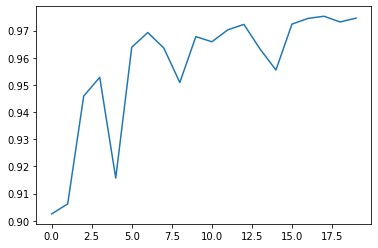

In [45]:
plt.plot(L(learn.recorder.values).itemgot(2));


In [46]:
final_acc = learn.recorder.values[-1][2]
print(f'The final accuracy of the above neural net is {final_acc}')

The final accuracy of the above neural net is 0.9746000170707703
